# Linear Regression

In this Notebook we would learn how to use linear models in regression problems.

- simple linear regression : a response variable and single explanatory variable
- multiple linear regression: can support more than one explanatory variable
- polynomial regression: model nonlinear relationships


## Simple Linear Regression
Simple
linear regression can be used to model a linear relationship between one response
variable and one explanatory variable

### Lets predict the cost of the Pizza 

<img src="Images/Pizza.jpg" width="70%">

Suppose that if you would think of designing the application to predict the cost of the Pizza from its size. Our initial impression is, larger the pizza higher the cost. But what if someone asked you to predict exact cost of the pizza if the exact size is given. As we are interested in value, this is an example of regression analysis.

#### Supervised Learning 
Regression analysis is a supervised machine learning techique. So we need a training data. Lets assume we have a toy data:
<img src="Images/Toy_data.jpg" width="70%">

In [1]:
import warnings
warnings.filterwarnings('ignore')

As the data set is of very small size, lets hardcode the values of X and y

In [2]:
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

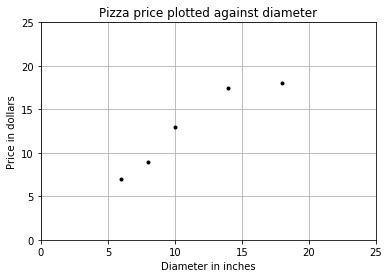

In [4]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

# Simple Linear Regression with one variable 

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

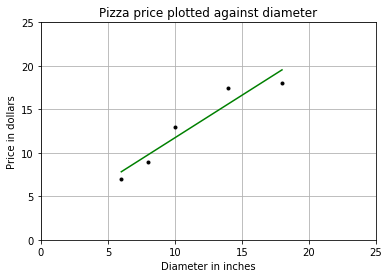

In [15]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.plot(X, model.predict(X),'g')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

## Your first Machine Learning App is ready  

In [19]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [20]:
def PrzzaPricePredictor(dia):
    print ('A %d " pizza should cost: $%.2f'%(dia,model.predict([dia])[0]))

In [21]:
i = interact(PrzzaPricePredictor, dia=(0,100))

A Jupyter Widget

## How good is your model ?

<img src="Images/Resedual_Error.jpg" width="80%">





In [23]:
import numpy as np
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 1.75


### Evaluating the model on Test Dataset 

Suppose that you applied this model to a test dataset as shown below:
<img src="Images/Toy_data_test.jpg" width="70%">



In [24]:
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]


In [25]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares: 3.84


## Multiple linear regression
Using your personal experience, you might have some intuitions that the cost of the Pizza is not oly dependent on the size but also on other factors like 'nunber of toppings'. So, lets assume that you asked for more data.

<img src="Images/Toy_data2.jpg" width="80%">

Now, the X would have two columns.

In [ ]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

### Here we would use the same model designed earlier, only difference is your X is having two columns 

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
def PrzzaTopPricePredictor(dia,Top):
    print ('A %d " with %d Topping pizza should cost: $%.2f'%(dia, Top,model.predict([dia,Top])))

### New App would look like this

In [29]:
i = interact(PrzzaTopPricePredictor, dia=(0,100), Top=(0,5))

A Jupyter Widget

### Evaluating the fitness of a model with a cost function

In [30]:
print ('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 1.75


## Polynomial regression

In [31]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [32]:
def PolynomialRegression(degree):
    
    X = [[6], [8], [10], [14], [18]]
    y = [[7], [9], [13], [17.5], [18]]
    
    # Simple linear regression first
    regressor = LinearRegression()
    regressor.fit(X, y)
    xx = np.linspace(0, 26, 100)
    yy = regressor.predict(xx.reshape(xx.shape[0], 1))
    
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_quadratic, y)
    xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
    
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_quadratic)- y) ** 2))
    
    plt.plot(xx, yy)
    plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
    plt.title('Pizza price regressed on diameter')
    plt.xlabel('Diameter in inches')
    plt.ylabel('Price in dollars')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    plt.scatter(X,y)
    plt.show()

    
    

In [33]:
i = interact(PolynomialRegression, degree=(0,10))

A Jupyter Widget

# Which Model to Use ?

<img src="Images/.jpg" width="50%">